In [1]:
sample_size_gtex_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/gtex_v7_sample_n.txt"

In [2]:
sample_size_gtex = read.csv(sample_size_gtex_filename, header = T)
head(sample_size_gtex)

tissue,n
Adipose - Subcutaneous,442
Adipose - Visceral (Omentum),355
Adrenal Gland,190
Artery - Aorta,299
Artery - Coronary,173
Artery - Tibial,441


In [3]:
dir = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"

In [4]:
egene_files = list.files(dir,"*.egenes.txt")

In [5]:
df = sample_size_gtex
df$tissue = gsub(" ","_",gsub("-","_",df$tissue))
df$tissue = gsub("\\)","",gsub("\\(","",df$tissue))
df$tissue = gsub("___","_",df$tissue)
df$tissue = gsub("__","_",df$tissue)
head(df)

tissue,n
Adipose_Subcutaneous,442
Adipose_Visceral_Omentum,355
Adrenal_Gland,190
Artery_Aorta,299
Artery_Coronary,173
Artery_Tibial,441


In [6]:
for (i in 1:length(egene_files)){
    file_name = egene_files[i]
    tissue = gsub(".v7.egenes.txt","",file_name)
    tissue = gsub("-","_",tissue)
    file = read.csv(paste0(dir,file_name), sep = "\t")
#     print(head(file))
#     print(nrow(file[file$qval < 0.01,]))
#     df[df$tissue == tissue,"fdr0.01"] = nrow(file[file$qval < 0.01,])
    df[df$tissue == tissue,"fdr0.05"] = nrow(file[file$qval < 0.05,])
#     df[df$tissue == tissue,"fdr0.1"] = nrow(file[file$qval < 0.1,])
}
df

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947
Bladder,11,NA
Brain_Amygdala,100,2229
Brain_Anterior_cingulate_cortex_BA24,121,4103
Brain_Caudate_basal_ganglia,160,5700


In [7]:
df$fdr0.01 <- c()
df$fdr0.1 <- c()
head(df)

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947


In [8]:
length(df$tissue[grep("Brain",df$tissue)])
length(df$tissue)
df

[1] 13

[1] 53

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947
Bladder,11,NA
Brain_Amygdala,100,2229
Brain_Anterior_cingulate_cortex_BA24,121,4103
Brain_Caudate_basal_ganglia,160,5700


In [9]:
# data_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/"
# leads_filename = paste0(data_folder,"eqtl/pool1_17.eqtl_discovery_all_leads.fdr0.1.tsv")
# leads = read.csv(leads_filename, header = T, sep = "\t")
# head(leads,2)

In [10]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv")
head(leads,2)

X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [11]:
df0 = data.frame()
for (i in 1:length(unique(leads$label))){
    celltype = unique(leads$label)[i]
    l = leads[leads$label == celltype,]
    df_tmp = data.frame(tissue = celltype, n = l$n_samples[1],
#                 fdr0.1 = length(unique(l$feature_id)),
                fdr0.05 = length(unique(l[l$q_value < 0.05,]$feature_id)))#,
#                 fdr0.01 = length(unique(l[l$global_corr_p_value < 0.01,]$feature_id)))
    df0 = rbind(df0,df_tmp)
}
df0

tissue,n,fdr0.05
FPP_D11,173,2560
P_FPP_D11,172,2457
FPP_D30,152,881
DA_D30,165,872
Sert_D30,151,776
Epen1_D30,133,1011
DA_D52,175,1024
Sert_D52,161,1436
Epen1_D52,169,1391
Astro_D52,120,257


In [12]:
df1 = data.frame(tissue = "neuroseq", n = max(df0$n),
#                 fdr0.1 = length(unique(leads$feature_id)),
                fdr0.05 = length(unique(leads[leads$q_value < 0.05,]$feature_id)))#,
#                 fdr0.01 = length(unique(leads[leads$global_corr_p_value < 0.01,]$feature_id)))
head(df1)

tissue,n,fdr0.05
neuroseq,175,4828


In [13]:
library(ggplot2)

In [14]:
df2 = rbind(df,df0,df1)

In [15]:
nrow(df2)

[1] 68

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 5 rows containing missing values (geom_point).”

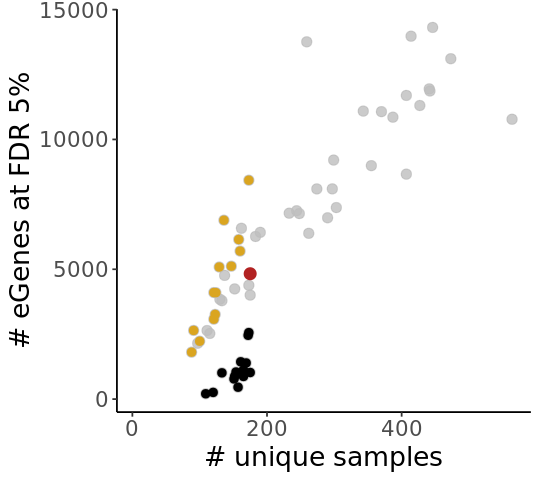

In [16]:
options(repr.plot.width = 4.5, repr.plot.height = 4)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8, col = 'gray') + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "goldenrod", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "firebrick", size = 3)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), size = 2, col = "black", border = 'white')+
        theme_classic() + theme(text = element_text(size=16))

In [25]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"
pdf(paste0(fig_dir,"Figure_4c_left.pdf"), width=4.5, height=4)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8, col = 'gray') + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "goldenrod", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "firebrick", size = 3)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), size = 2, col = "black", border = 'white')+
        theme_classic() + theme(text = element_text(size=16))
dev.off()

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 5 rows containing missing values (geom_point).”

png 
  2

In [17]:
head(df0,2)

tissue,n,fdr0.05
FPP_D11,173,2560
P_FPP_D11,172,2457


In [18]:
df0$celltype = gsub("_D[0-9].*","",df0$tissue)
# unique(df0$celltype)
df0$condition[grep("D11",df0$tissue)] = "D11"
df0$condition[grep("D30",df0$tissue)] = "D30"
df0$condition[grep("D52",df0$tissue)] = "D52"
df0$condition[grep("D52_ROT",df0$tissue)] = "D52_ROT"

In [19]:
df0

tissue,n,fdr0.05,celltype,condition
FPP_D11,173,2560,FPP,D11
P_FPP_D11,172,2457,P_FPP,D11
FPP_D30,152,881,FPP,D30
DA_D30,165,872,DA,D30
Sert_D30,151,776,Sert,D30
Epen1_D30,133,1011,Epen1,D30
DA_D52,175,1024,DA,D52
Sert_D52,161,1436,Sert,D52
Epen1_D52,169,1391,Epen1,D52
Astro_D52,120,257,Astro,D52


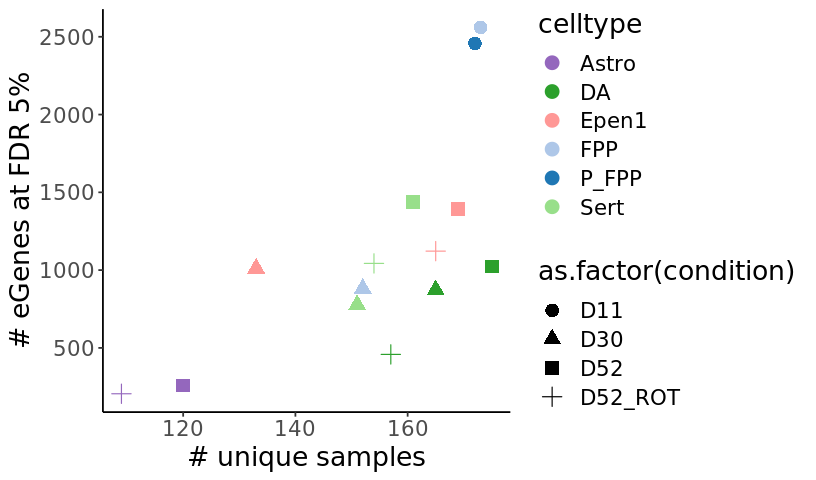

In [20]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

options(repr.plot.width = 6.8, repr.plot.height = 4)
ggplot(df0, aes(x = n, y = fdr0.05, colour = celltype, shape = as.factor(condition))) + 
        geom_point(size = 3.5) + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        scale_color_manual(values = c(col_Astro, col_DA, col_Epen1,col_FPP,col_P_FPP,col_Sert)) +
        theme_classic() + theme(text = element_text(size=16))

In [26]:
pdf(paste0(fig_dir,"Figure_4c_right.pdf"), width=6.8, height=4)
ggplot(df0, aes(x = n, y = fdr0.05, colour = celltype, shape = as.factor(condition))) + 
        geom_point(size = 3.5) + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        scale_color_manual(values = c(col_Astro, col_DA, col_Epen1,col_FPP,col_P_FPP,col_Sert)) +
        theme_classic() + theme(text = element_text(size=16))
dev.off()

png 
  2

In [21]:
head(df0,2)
head(df2,2)

tissue,n,fdr0.05,celltype,condition
FPP_D11,173,2560,FPP,D11
P_FPP_D11,172,2457,P_FPP,D11


tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991


In [22]:
day52_folder ="/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/"
pseudobulk = read.csv(paste0(day52_folder,"input_files_untreated/pseudobulk/top_qtl_results_all.txt"),sep="\t")
head(pseudobulk,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
5_54468124_A_T,0.011296811,-0.1120261,0.04421999,0.5425102,5,54603588,54721409,193,193,0.5733530,30.80818,5,54468124,T,1,0.3134715,0.8673414,ENSG00000039123
5_56744673_T_C,0.001488166,0.1186910,0.03735967,0.3619907,5,56469775,56560506,193,193,0.6127045,118.98902,5,56744673,C,1,0.3989637,0.2963696,ENSG00000062194


In [23]:
library(qvalue)
pseudobulk$q_value = qvalue(pseudobulk$empirical_feature_p_value)$qvalues
nrow(pseudobulk[pseudobulk$q_value <0.05,])

[1] 2249

In [24]:
df_pseudo = data.frame(tissue = "pseudobulk_D52", 
                       n = pseudobulk$n_samples, 
                       fdr0.05 = nrow(pseudobulk[pseudobulk$q_value <0.05,]))

In [25]:
head(df_pseudo,2)

tissue,n,fdr0.05
pseudobulk_D52,193,2249
pseudobulk_D52,193,2249


In [26]:
df2_pseudo = rbind(df2, df_pseudo)

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 5 rows containing missing values (geom_point).”

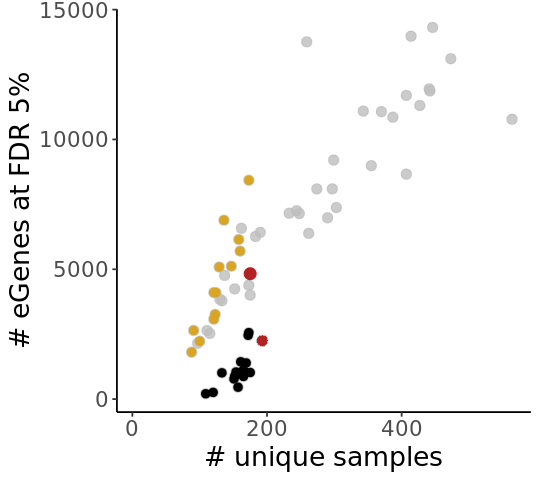

In [27]:
df2_all = df2
df2 = df2_pseudo
#
options(repr.plot.width = 4.5, repr.plot.height = 4)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8, col = 'gray') + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "goldenrod", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "firebrick", size = 3)+
        geom_point(data = df2[df2$tissue == "pseudobulk_D52",], aes(x = n, y = fdr0.05), col = "firebrick", size = 2)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), size = 2, col = "black", border = 'white')+
        theme_classic() + theme(text = element_text(size=16))

In [28]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
pdf(paste0(fig_dir,"Extended_Figure_7c_left.pdf"), width=4.5, height=4)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8, col = 'gray') + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "goldenrod", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "firebrick", size = 3)+
        geom_point(data = df2[df2$tissue == "pseudobulk_D52",], aes(x = n, y = fdr0.05), col = "firebrick", size = 2)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), size = 2, col = "black", border = 'white')+
        theme_classic() + theme(text = element_text(size=16))
dev.off()
df2 = df2_all

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 5 rows containing missing values (geom_point).”

png 
  2

In [29]:
df_pseudo$celltype = "pseudobulk"
df_pseudo$condition = "D52"
head(df_pseudo,2)

tissue,n,fdr0.05,celltype,condition
pseudobulk_D52,193,2249,pseudobulk,D52
pseudobulk_D52,193,2249,pseudobulk,D52


In [30]:
df0_pseudo = rbind(df0, df_pseudo)

In [31]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"
col_pseudo = "firebrick"

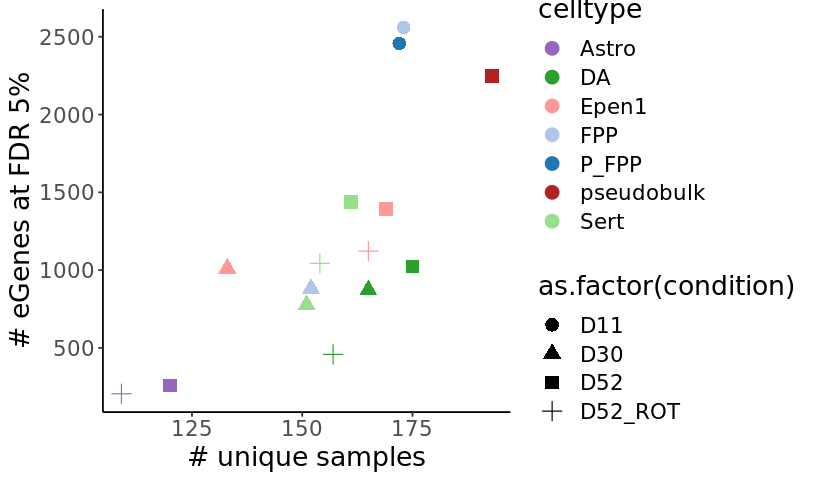

In [33]:
df0_all = df0
df0 = df0_pseudo
options(repr.plot.width = 6.8, repr.plot.height = 4)
ggplot(df0, aes(x = n, y = fdr0.05, colour = celltype, shape = as.factor(condition))) + 
        geom_point(size = 3.5) + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        scale_color_manual(values = c(col_Astro, col_DA, col_Epen1,col_FPP,col_P_FPP,col_pseudo,col_Sert)) +
        theme_classic() + theme(text = element_text(size=16))

In [34]:
pdf(paste0(fig_dir,"Extended_Figure_7c_right.pdf"), width=6.8, height=4)
ggplot(df0, aes(x = n, y = fdr0.05, colour = celltype, shape = as.factor(condition))) + 
        geom_point(size = 3.5) + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        scale_color_manual(values = c(col_Astro, col_DA, col_Epen1,col_FPP,col_P_FPP,col_pseudo,col_Sert)) +
        theme_classic() + theme(text = element_text(size=16))
dev.off()
df0 = df0_all

png 
  2